In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import seaborn as sns

In [136]:
df = pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID', axis=1, inplace=True)

In [137]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# EDA

In [138]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [139]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


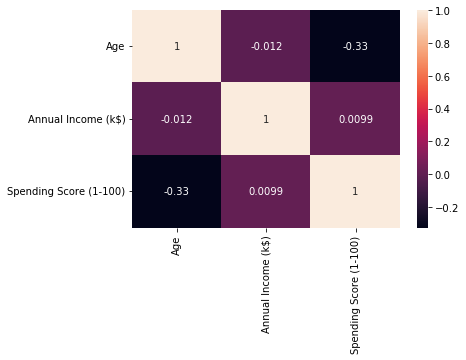

In [140]:
sns.heatmap(df.corr(), annot=True) 

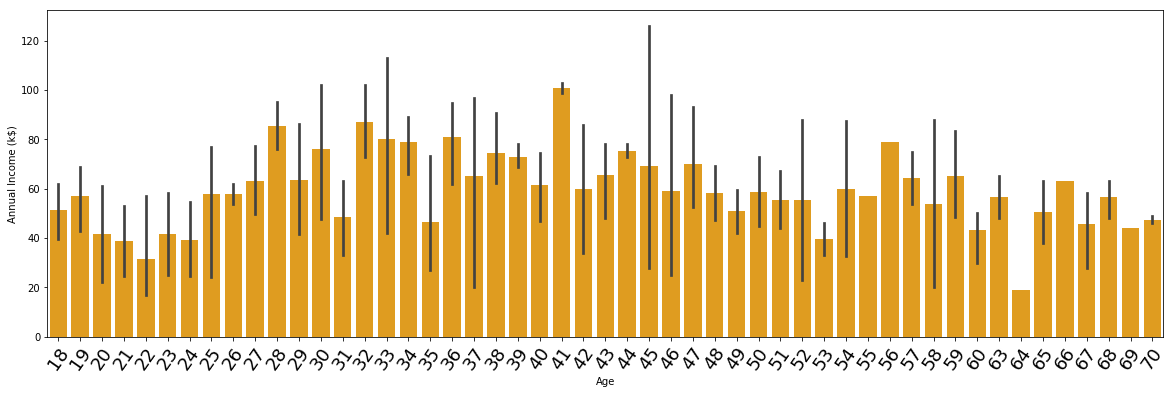

In [141]:
plt.figure(figsize=(20,6))
# sns.set(font_scale =2)

p=sns.barplot(x='Age',y='Annual Income (k$)',data=df,color='orange')
plt.xticks(rotation=55,fontsize = 18)

plt.show()

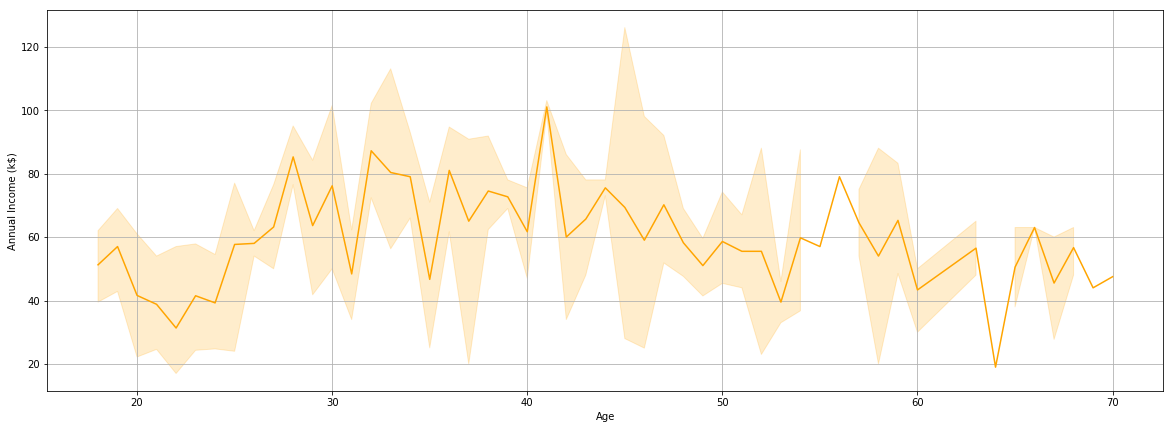

In [142]:
plt.figure(figsize=(20,7))
plt.grid(True)

sns.lineplot(data=df, x='Age',y='Annual Income (k$)',color="orange")
plt.show()

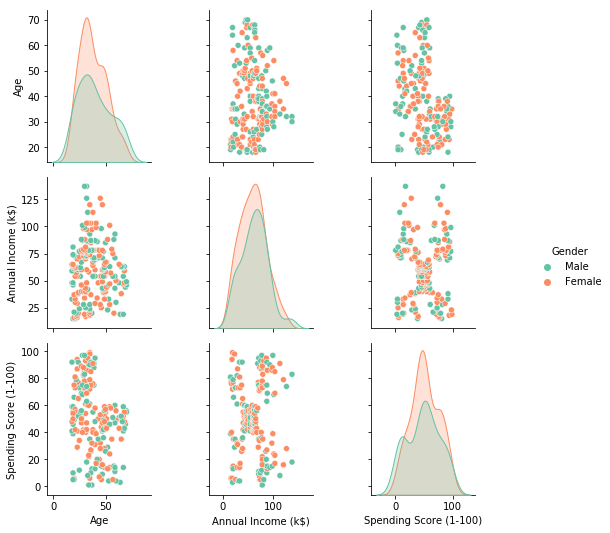

In [143]:
sns.pairplot(df, hue= 'Gender',palette='Set2')

# Data Pre-processing

In [144]:
dummy = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([dummy,df],axis=1)
df = df.drop('Gender',axis=1)

In [145]:
df.head()

,Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(df)

In [148]:
#scaler

# Model = K-Means

In [149]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=2)
cluster_labels=model.fit_predict(scaled_x)

In [150]:
cluster_labels

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [151]:
df['Cluster']=cluster_labels

In [155]:
df.head(2)

,Male,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,1
1,1,21,15,81,1


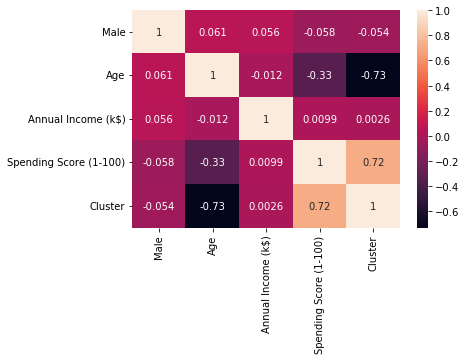

In [152]:
sns.heatmap(df.corr(),annot=True)

In [153]:
df.corr()['Cluster'].sort_values()

Age                      -0.730519
Male                     -0.054014
Annual Income (k$)        0.002551
Spending Score (1-100)    0.720697
Cluster                   1.000000
Name: Cluster, dtype: float64

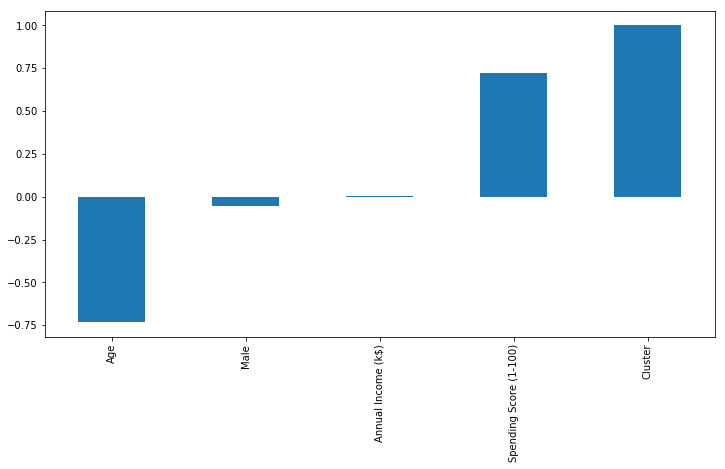

In [154]:
plt.figure(figsize=(12,6))
df.corr()['Cluster'].sort_values().plot(kind='bar')

# Finding the Best K

In [108]:
ssd=[]

for k in range(2,10):
    model=KMeans(n_clusters=k)
    
    model.fit(scaled_x)
    ssd.append(model.inertia_)

Text(0,0.5,'Sum of Squred Distances')

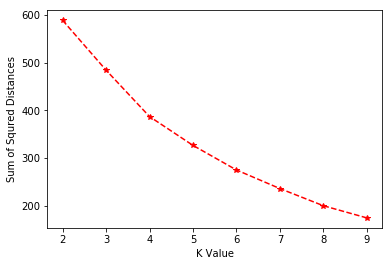

In [110]:
plt.plot(range(2,10), ssd, '*--',color='red')
plt.xlabel('K Value')
plt.ylabel('Sum of Squred Distances')

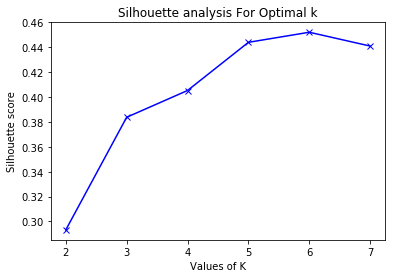

In [134]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,8))
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
 # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')    
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Best K = 6

In [156]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=6)
cluster_labels=model.fit_predict(scaled_x)

In [157]:
cluster_labels

array([2, 2, 0, 0, 0, 0, 3, 0, 4, 0, 4, 0, 3, 0, 4, 2, 0, 2, 4, 0, 4, 2,
       3, 2, 3, 2, 3, 2, 3, 0, 4, 0, 4, 2, 3, 0, 3, 0, 3, 0, 3, 2, 4, 0,
       3, 0, 3, 0, 0, 0, 3, 2, 0, 4, 3, 4, 3, 4, 0, 4, 4, 2, 3, 3, 4, 2,
       3, 3, 2, 0, 4, 3, 3, 3, 4, 2, 3, 2, 0, 3, 4, 2, 4, 3, 0, 4, 3, 0,
       0, 3, 3, 2, 4, 3, 0, 2, 3, 0, 4, 2, 0, 3, 4, 2, 4, 0, 3, 4, 4, 4,
       4, 0, 3, 2, 0, 0, 3, 3, 3, 3, 2, 3, 3, 2, 0, 5, 1, 2, 4, 2, 1, 2,
       0, 5, 1, 5, 1, 2, 1, 5, 3, 2, 0, 5, 1, 2, 1, 5, 1, 2, 1, 2, 3, 5,
       3, 5, 1, 5, 1, 5, 3, 5, 1, 5, 1, 5, 1, 5, 1, 2, 1, 2, 1, 2, 1, 5,
       1, 2, 1, 2, 1, 5, 1, 5, 1, 2, 1, 2, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5])

In [158]:
df_k_6 = df.drop('Cluster', axis=1)

In [159]:
df_k_6['Cluster']=cluster_labels

In [160]:
df_k_6.head(2)

,Male,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2


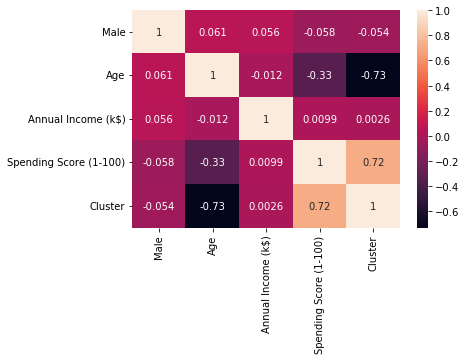

In [161]:
sns.heatmap(df.corr(),annot=True)

In [162]:
df.corr()['Cluster'].sort_values()

Age                      -0.730519
Male                     -0.054014
Annual Income (k$)        0.002551
Spending Score (1-100)    0.720697
Cluster                   1.000000
Name: Cluster, dtype: float64

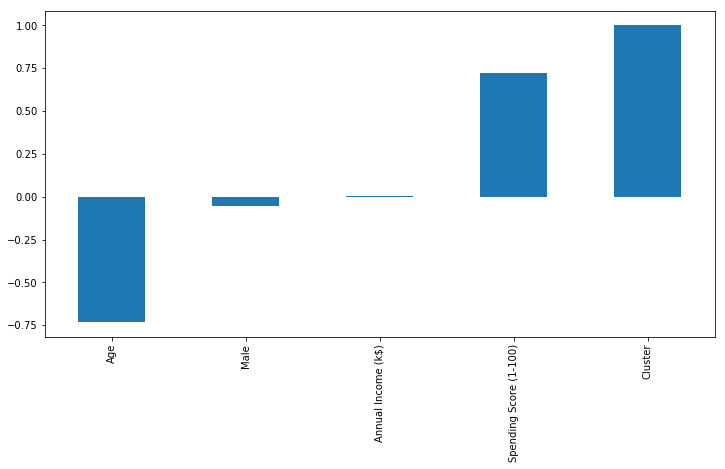

In [163]:
plt.figure(figsize=(12,6))
df.corr()['Cluster'].sort_values().plot(kind='bar')